In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('EastWestAirlines.csv')

In [3]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
df.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [5]:
df.drop(['ID','Award'],axis=1,inplace=True)

In [6]:
df.shape

(3999, 10)

In [7]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [8]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


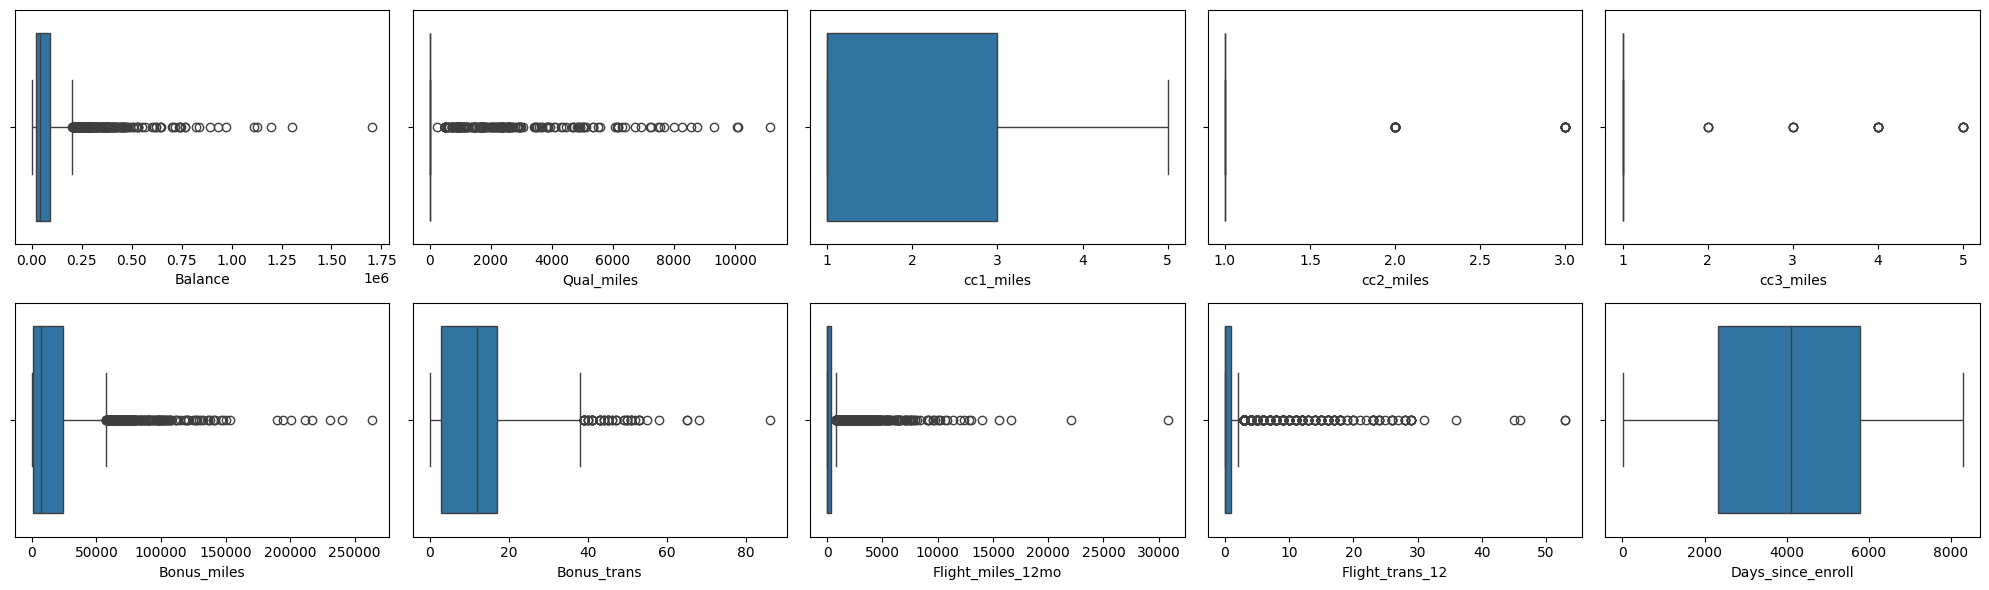

In [9]:
plt.figure(figsize=(20,6))
for i,col_name in enumerate(df.columns,start=1):
    plt.subplot(2,5,i)
    sns.boxplot(x=df[col_name])
plt.tight_layout()
plt.show()

In [10]:
for col_name in df.columns:
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    
    df[col_name]=df[col_name].clip(lower_limit,upper_limit)

In [11]:
df.shape

(3999, 10)

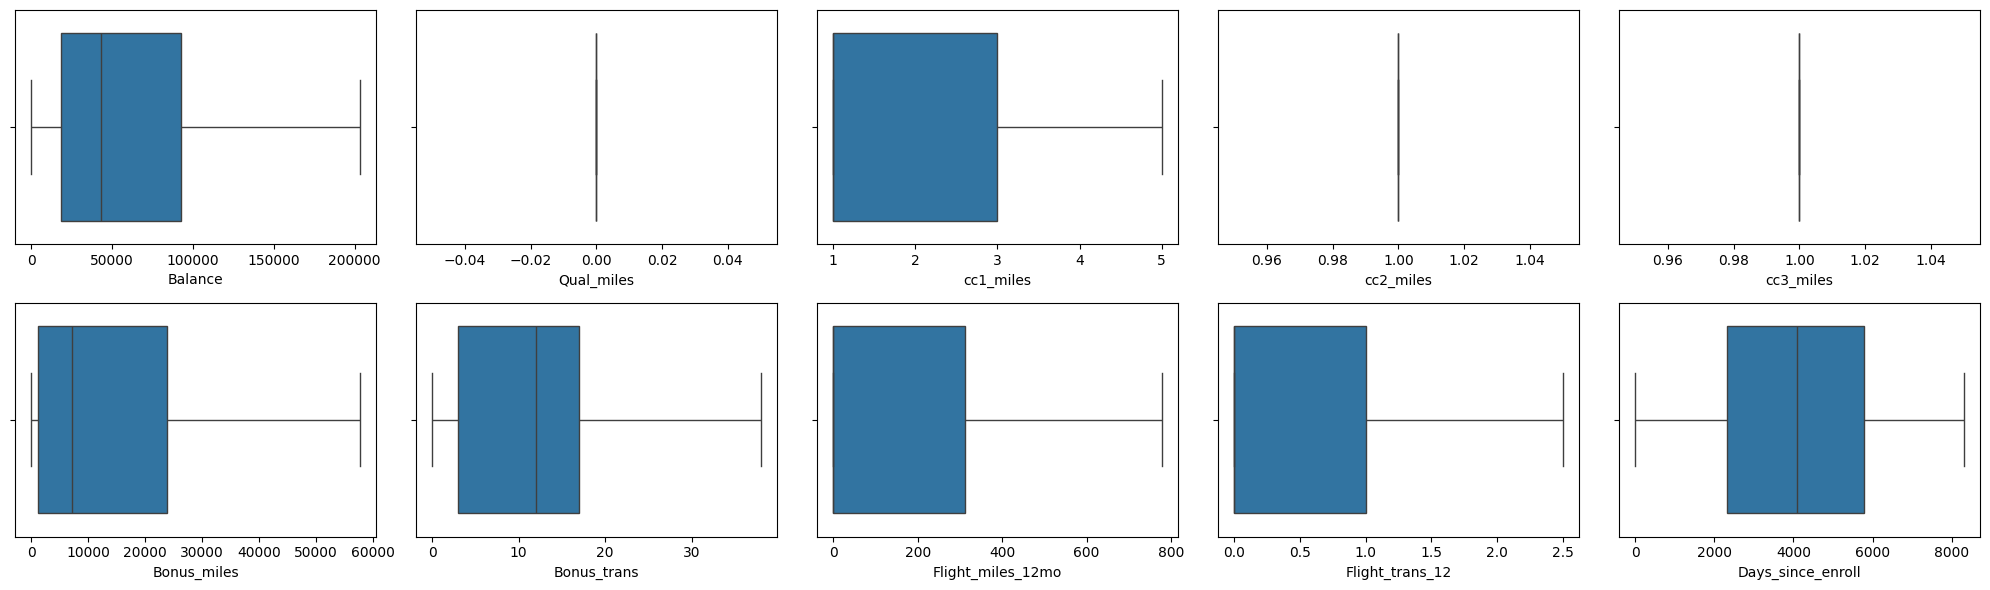

In [12]:
plt.figure(figsize=(20,6))
for i,col_name in enumerate(df.columns,start=1):
    plt.subplot(2,5,i)
    sns.boxplot(x=df[col_name])
plt.tight_layout()
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scale=StandardScaler()

In [15]:
df_transformed=scale.fit_transform(df)

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

In [17]:
X_pca=pca.fit_transform(df_transformed)

In [18]:
pca.explained_variance_

array([3.22769842, 1.70296648])

In [19]:
pca.explained_variance_ratio_

array([0.46098447, 0.24322009])

In [20]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering

In [21]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    print(f'n_clusters={i} wcss={kmeans.inertia_}')

n_clusters=1 wcss=19712.798289108796
n_clusters=2 wcss=10641.191675660059
n_clusters=3 wcss=6065.882807513522
n_clusters=4 wcss=3737.9911175144775
n_clusters=5 wcss=2683.2014824138278
n_clusters=6 wcss=2371.9068179723777
n_clusters=7 wcss=1892.384539443537
n_clusters=8 wcss=1630.2710447903014
n_clusters=9 wcss=1474.7855192887457
n_clusters=10 wcss=1146.2561184364658


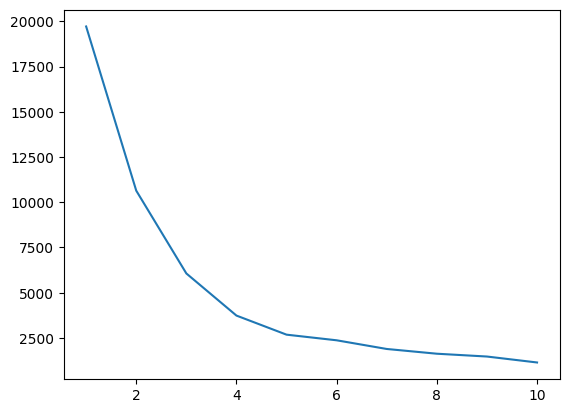

In [22]:
plt.plot(range(1,11),wcss)
plt.show()

here 4 is the more optimal value for n_clusters

In [23]:
kmeans=KMeans(n_clusters=4)

In [24]:
labels=kmeans.fit_predict(X_pca)

In [25]:
from sklearn.metrics import silhouette_score

In [26]:
round(silhouette_score(X_pca,labels),2)

0.56

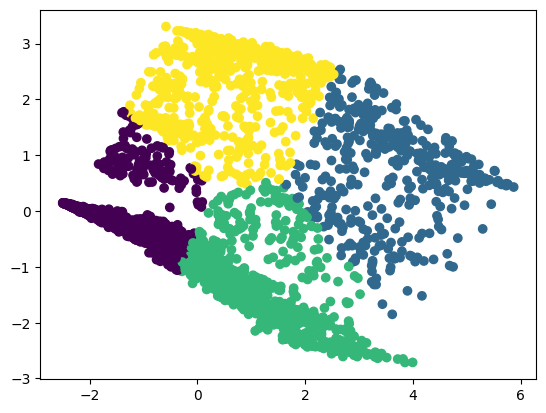

In [27]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=labels)
plt.show()

In [28]:
eps_list = [0.2, 0.3, 0.4, 0.5, 0.6]
min_samples_list = [5, 7, 9, 11, 13]

In [29]:
best_score = -1
best_params = None

for eps_val in eps_list:
    for min_s in min_samples_list:
        db = DBSCAN(eps=eps_val, min_samples=min_s,n_jobs=-1)
        dbscan_labels = db.fit_predict(X_pca)

        mask = dbscan_labels != -1
        unique_clusters = set(dbscan_labels[mask])

        if len(unique_clusters) < 2:   # skip invalid cases
            continue

        score = silhouette_score(X_pca[mask], dbscan_labels[mask])

        if score > best_score:
            best_score = score
            best_params = (eps_val, min_s)

print("Best Silhouette Score:", round(best_score,2))
print("Best Params:", best_params)


Best Silhouette Score: 0.44
Best Params: (0.3, 11)


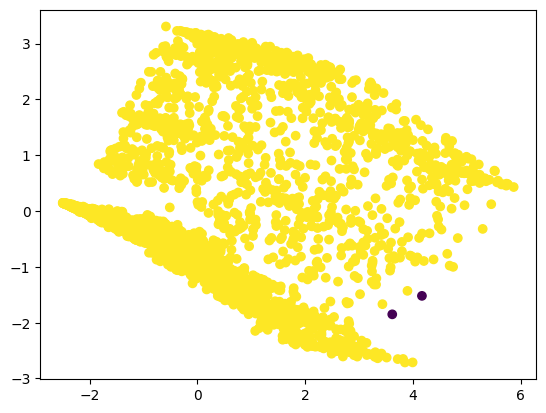

In [30]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels)

In [41]:
agg=AgglomerativeClustering(n_clusters=2)

In [42]:
agg_labels=agg.fit_predict(X_pca)

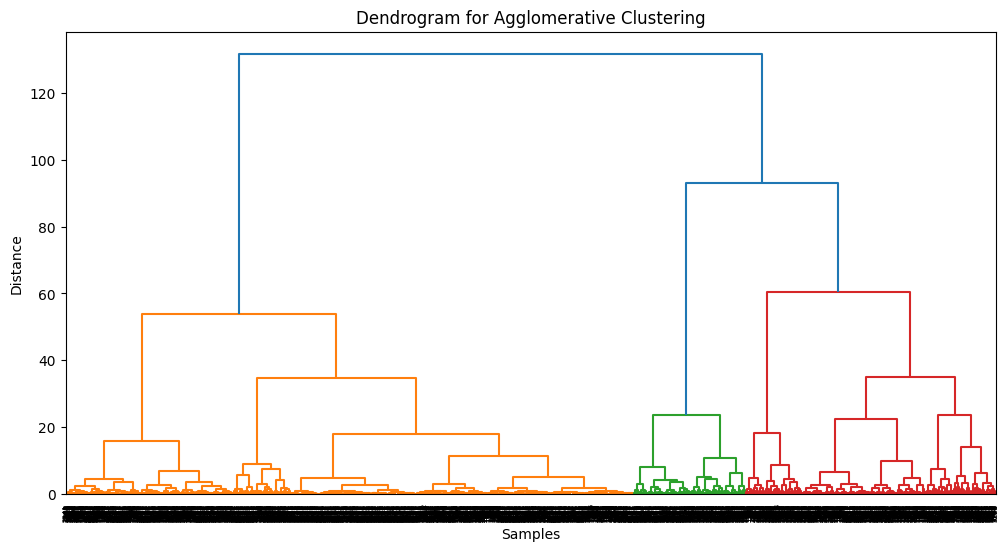

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# X_scaled is your data
Z = linkage(X_pca,method='ward') 

plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
